## Unsupervised Learning Project
Instructions for the Mini Project III.


### Topics
This mini project is dedicated to following topics:
- Data Wrangling
- Data Visualization
- Data Preparation and Feature Engineering
- Dimensionality Reduction
- Unsupervised Learning

### Data
We will be using old data about different financial transactions. You can download the data from [here](https://drive.google.com/file/d/1zAjnf936aHkwVCq_BmA47p4lpRjyRzMf/view?usp=sharing). The data contains following tables:

- twm_customer - information about customers
- twm_accounts - information about accounts
- twm_checking_accounts - information about checking accounts (subset of twm_accounts)
- twm_credit_accounts - information about checking accounts (subset of twm_accounts)
- twm_savings_accounts - information about checking accounts (subset of twm_accounts)
- twm_transactions - information about financial transactions
- twm_savings_tran - information about savings transactions (subset of twm_transactions)
- twm_checking_tran - information about savings transactions (subset of twm_transactions)
- twm_credit_tran - information about credit checking (subset of twm_transactions)


### Output

In this miniproject, we will:

1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?
2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans



#### 1.Create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
        - based on demographics (only on the information from twm_customer)

In [2]:
#Read files:
dt_customer = pd.read_csv("twm_customer.csv", delimiter=';')

In [3]:
dt_customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [4]:
dt_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [5]:
# Delete column from the DataFrame
columns_drop = ['cust_id','name_prefix','first_name', 'last_name', 'street_nbr','street_name',
                           'postal_code', 'city_name', 'state_code']
futures_df = dt_customer.drop(columns_drop, axis=1)

futures_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,M,2
1,6605,71,1,0,M,2
2,18548,38,8,0,F,1
3,47668,54,3,0,F,1
4,44554,59,9,2,F,4


In [6]:
gender = futures_df.groupby('gender').size()
gender

gender
F     418
M     329
dtype: int64

In [7]:
#futures_df['gender'] = futures_df['gender'].map({'M': 1, 'F': 0})

#futures_df.head()

In [8]:
gender_dummies = pd.get_dummies(futures_df['gender'], prefix='gender')
futures_df = pd.concat([futures_df, gender_dummies], axis=1)
futures_df.drop('gender', axis=1, inplace=True)
futures_df.head()

,income,age,years_with_bank,nbr_children,marital_status,gender_F,gender_M
0,26150,46,5,1,2,0,1
1,6605,71,1,0,2,0,1
2,18548,38,8,0,1,1,0
3,47668,54,3,0,1,1,0
4,44554,59,9,2,4,1,0


In [9]:
futures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   income           747 non-null    int64
 1   age              747 non-null    int64
 2   years_with_bank  747 non-null    int64
 3   nbr_children     747 non-null    int64
 4   marital_status   747 non-null    int64
 5   gender_F         747 non-null    uint8
 6   gender_M         747 non-null    uint8
dtypes: int64(5), uint8(2)
memory usage: 30.8 KB


In [10]:
futures_df.rename(columns={'gender_F ': 'gender_F', 'gender_M ':'gender_M'}, inplace=True)

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Z-score normalization
selected_columns = ['income', 'age', 'years_with_bank', 'nbr_children']

scaler_zscore = StandardScaler()
data_zscore = scaler_zscore.fit_transform(futures_df[selected_columns])
data_zscore



array([[ 0.1541846 ,  0.18431237,  0.40853922,  0.25859076],
       [-0.72652421,  1.49307037, -1.08743527, -0.64829796],
       [-0.18836584, -0.23449019,  1.53052009, -0.64829796],
       ...,
       [ 1.73806357,  0.39371365, -1.4614289 ,  1.16547947],
       [-0.34373468, -0.28684051,  1.15652647, -0.64829796],
       [-0.21869161, -1.28149658, -0.33944803, -0.64829796]])

In [13]:
df_customer = pd.DataFrame(data_zscore)

In [14]:
df_customer

,0,1,2,3
0,0.154185,0.184312,0.408539,0.258591
1,-0.726524,1.493070,-1.087435,-0.648298
2,-0.188366,-0.234490,1.530520,-0.648298
3,1.123798,0.603115,-0.339448,-0.648298
4,0.983479,0.864867,1.904514,1.165479
...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591
743,0.164864,0.707816,0.782533,0.258591
744,1.738064,0.393714,-1.461429,1.165479
745,-0.343735,-0.286841,1.156526,-0.648298


In [15]:

df_customer.columns = df_customer.columns.astype(str)

df_customer.rename(columns={'0': 'income', '1':'age', '2':'years_with_bank', '3': 'nbr_children'}, inplace=True)

In [16]:
df_customer

,income,age,years_with_bank,nbr_children
0,0.154185,0.184312,0.408539,0.258591
1,-0.726524,1.493070,-1.087435,-0.648298
2,-0.188366,-0.234490,1.530520,-0.648298
3,1.123798,0.603115,-0.339448,-0.648298
4,0.983479,0.864867,1.904514,1.165479
...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591
743,0.164864,0.707816,0.782533,0.258591
744,1.738064,0.393714,-1.461429,1.165479
745,-0.343735,-0.286841,1.156526,-0.648298


In [17]:
data_sub = pd.concat([df_customer, futures_df[['marital_status','gender_F', 'gender_M' ]]], axis=1)
data_sub.head()

,income,age,years_with_bank,nbr_children,marital_status,gender_F,gender_M
0,0.154185,0.184312,0.408539,0.258591,2,0,1
1,-0.726524,1.493070,-1.087435,-0.648298,2,0,1
2,-0.188366,-0.234490,1.530520,-0.648298,1,1,0
3,1.123798,0.603115,-0.339448,-0.648298,1,1,0
4,0.983479,0.864867,1.904514,1.165479,4,1,0


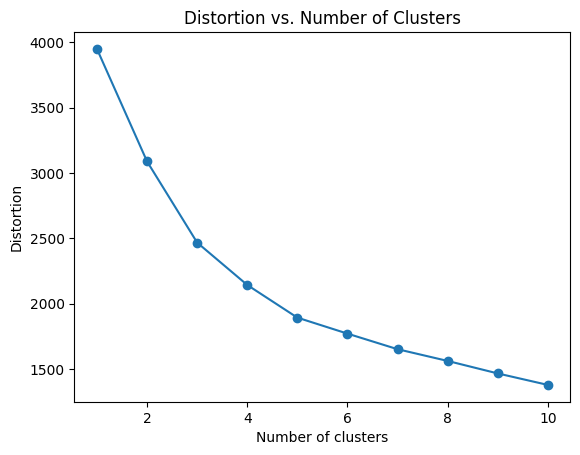

In [18]:

def plot_distortion(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
       
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Distortion vs. Number of Clusters')
    plt.show()

plot_distortion(data_sub)


n=4

 K-Means

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_sub)

cluster_labels = kmeans.labels_

data_sub['cluster_k'] = cluster_labels

data_sub['cluster_k'].value_counts()

c:\Users\Tania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    252
1    242
0    169
2     84
Name: cluster_k, dtype: int64

In [20]:
data_sub.head()

,income,age,years_with_bank,nbr_children,marital_status,gender_F,gender_M,cluster_k
0,0.154185,0.184312,0.408539,0.258591,2,0,1,3
1,-0.726524,1.493070,-1.087435,-0.648298,2,0,1,3
2,-0.188366,-0.234490,1.530520,-0.648298,1,1,0,1
3,1.123798,0.603115,-0.339448,-0.648298,1,1,0,2
4,0.983479,0.864867,1.904514,1.165479,4,1,0,0


PCA

In [21]:
df_customer.head()

,income,age,years_with_bank,nbr_children
0,0.154185,0.184312,0.408539,0.258591
1,-0.726524,1.493070,-1.087435,-0.648298
2,-0.188366,-0.234490,1.530520,-0.648298
3,1.123798,0.603115,-0.339448,-0.648298
4,0.983479,0.864867,1.904514,1.165479


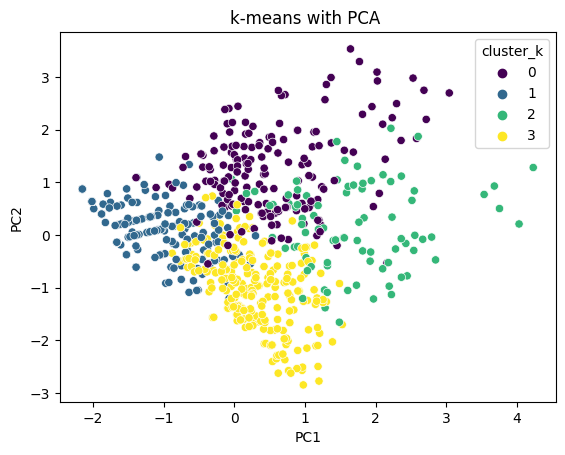

In [22]:

from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_customer)


df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster_k'] = data_sub['cluster_k'] 

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster_k', palette='viridis')
plt.title('k-means with PCA ')
plt.show()

In [23]:
principal_components

array([[ 0.42765301, -0.12063936],
       [-0.2954192 , -0.67050116],
       [-0.07403926, -1.20818669],
       ...,
       [ 1.45289827,  1.77112264],
       [-0.31679554, -1.00654937],
       [-1.18895024,  0.34310894]])

In [24]:
df_pca

,PC1,PC2,cluster_k
0,0.427653,-0.120639,3
1,-0.295419,-0.670501,3
2,-0.074039,-1.208187,1
3,0.722583,-0.251491,2
4,2.161632,-0.530545,0
...,...,...,...
742,-0.089756,-0.198681,0
743,0.818982,-0.579561,3
744,1.452898,1.771123,2
745,-0.316796,-1.006549,3


Aglomerative clustering

In [25]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [26]:
data_sub.head()


,income,age,years_with_bank,nbr_children,marital_status,gender_F,gender_M,cluster_k
0,0.154185,0.184312,0.408539,0.258591,2,0,1,3
1,-0.726524,1.493070,-1.087435,-0.648298,2,0,1,3
2,-0.188366,-0.234490,1.530520,-0.648298,1,1,0,1
3,1.123798,0.603115,-0.339448,-0.648298,1,1,0,2
4,0.983479,0.864867,1.904514,1.165479,4,1,0,0


In [27]:
columns_drop = {'cluster_k'}
data_alg = data_sub.drop(columns_drop, axis=1)
data_alg

,income,age,years_with_bank,nbr_children,marital_status,gender_F,gender_M
0,0.154185,0.184312,0.408539,0.258591,2,0,1
1,-0.726524,1.493070,-1.087435,-0.648298,2,0,1
2,-0.188366,-0.234490,1.530520,-0.648298,1,1,0
3,1.123798,0.603115,-0.339448,-0.648298,1,1,0
4,0.983479,0.864867,1.904514,1.165479,4,1,0
...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,4,1,0
743,0.164864,0.707816,0.782533,0.258591,2,0,1
744,1.738064,0.393714,-1.461429,1.165479,2,0,1
745,-0.343735,-0.286841,1.156526,-0.648298,2,1,0


In [28]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

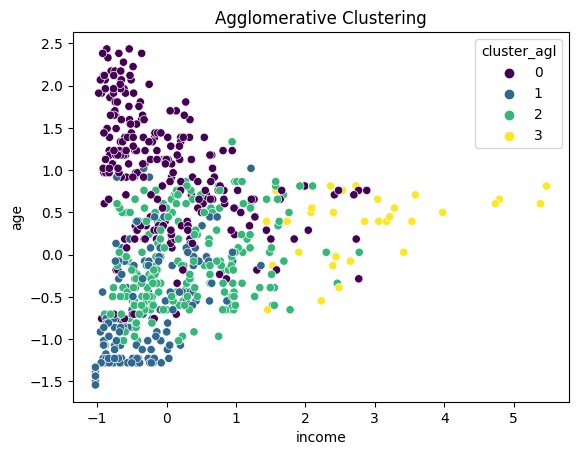

In [29]:
clustering = AgglomerativeClustering(n_clusters=4)
cluster_labels = clustering.fit_predict(data_alg)


data_alg['cluster_agl'] = cluster_labels


sns.scatterplot(data=data_alg, x='income', y='age', hue='cluster_agl', palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [30]:
data_alg['cluster_agl'].value_counts()

0    252
1    250
2    214
3     31
Name: cluster_agl, dtype: int64

In [31]:

df_pca2=df_pca.drop('cluster_k', axis=1)
df_pca2

,PC1,PC2
0,0.427653,-0.120639
1,-0.295419,-0.670501
2,-0.074039,-1.208187
3,0.722583,-0.251491
4,2.161632,-0.530545
...,...,...
742,-0.089756,-0.198681
743,0.818982,-0.579561
744,1.452898,1.771123
745,-0.316796,-1.006549


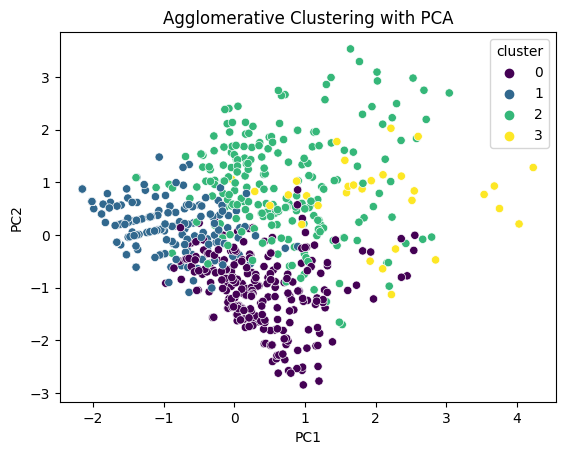

In [32]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

df_pca2['cluster'] = data_alg['cluster_agl']

# Plotting the results
sns.scatterplot(data=df_pca2, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('Agglomerative Clustering with PCA')
plt.show()


### 1.Create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
  
- based on their banking behavior. We can take following things into consideration as banking behavior:
    - do they have savings account? How much do they save?
    - do they have credit account? How much do they live in debt?
    - are they making lot of small transactions or few huge ones?

In [33]:
dt_accounts = pd.read_csv("twm_accounts.csv", delimiter=';')

In [34]:
dt_accounts

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [35]:
dt_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [36]:
cust_id= dt_accounts.groupby('cust_id').size()
cust_id

cust_id
1362480    3
1362484    3
1362485    2
1362486    2
1362487    3
          ..
1363490    1
1363491    1
1363492    3
1363493    3
1363495    2
Length: 665, dtype: int64

In [37]:
acc_active_type = dt_accounts.groupby('account_active').size()
acc_active_type

account_active
N      143
Y     1266
dtype: int64

In [38]:
acc_types= dt_accounts.groupby('acct_type').size()
acc_types

acct_type
CC      468
CK      520
SV      421
dtype: int64

1) CC: Credit Card Account
2) CK: Checking Account
3) SV: Savings Account

'acct_type', 'account_active', 'starting_balance', 'ending_balance'

In [39]:
data_account = pd.DataFrame()
data_account[['acct_nbr','acct_type', 'account_active', 'starting_balance', 'ending_balance']] = dt_accounts[['acct_nbr','acct_type', 'account_active', 'starting_balance', 'ending_balance']]
data_account

,acct_nbr,acct_type,account_active,starting_balance,ending_balance
0,13628063,SV,Y,1430.22,284.58
1,4561143213627090,CC,Y,266.34,496.15
2,4561143213628360,CC,Y,55.90,1000.00
3,13633112,CK,Y,11017.13,968.46
4,4561143213633610,CC,Y,849.37,462.28
...,...,...,...,...,...
1404,4561143213625560,CC,N,1433.94,20.00
1405,4561143213626240,CC,Y,632.75,1400.00
1406,4561143213628750,CC,Y,2810.91,3000.00
1407,13626543,SV,Y,784.53,622.46


In [40]:
data_account.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   acct_type         1409 non-null   object 
 2   account_active    1409 non-null   object 
 3   starting_balance  1409 non-null   float64
 4   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 55.2+ KB


### - do they have savings account? How much do they save?

In [41]:
saving_acc = data_account[data_account['acct_type'] == 'SV  ']
saving_acc

,acct_nbr,acct_type,account_active,starting_balance,ending_balance
0,13628063,SV,Y,1430.22,284.58
12,13626413,SV,N,139.95,141.92
13,13633773,SV,Y,610.91,1782.06
15,13629403,SV,Y,165.68,778.84
20,13628233,SV,Y,428.17,491.88
...,...,...,...,...,...
1388,13626683,SV,Y,213.91,1470.67
1389,13629803,SV,Y,232.00,310.32
1399,13624803,SV,Y,707.09,1187.97
1402,13628933,SV,Y,290.57,976.43


In [42]:
saving_acc['saving'] =saving_acc['ending_balance'] - saving_acc['starting_balance']
saving_acc

C:\Users\Tania\AppData\Local\Temp\ipykernel_9388\2592631928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saving_acc['saving'] =saving_acc['ending_balance'] - saving_acc['starting_balance']


,acct_nbr,acct_type,account_active,starting_balance,ending_balance,saving
0,13628063,SV,Y,1430.22,284.58,-1145.64
12,13626413,SV,N,139.95,141.92,1.97
13,13633773,SV,Y,610.91,1782.06,1171.15
15,13629403,SV,Y,165.68,778.84,613.16
20,13628233,SV,Y,428.17,491.88,63.71
...,...,...,...,...,...,...
1388,13626683,SV,Y,213.91,1470.67,1256.76
1389,13629803,SV,Y,232.00,310.32,78.32
1399,13624803,SV,Y,707.09,1187.97,480.88
1402,13628933,SV,Y,290.57,976.43,685.86


###  - do they have credit account? How much do they live in debt?

In [43]:
debt_acc = data_account[data_account['acct_type'] == 'CC  ']
debt_acc

,acct_nbr,acct_type,account_active,starting_balance,ending_balance
1,4561143213627090,CC,Y,266.34,496.15
2,4561143213628360,CC,Y,55.90,1000.00
4,4561143213633610,CC,Y,849.37,462.28
5,4561143213631020,CC,Y,0.00,1000.00
6,4561143213633270,CC,Y,0.00,3000.00
...,...,...,...,...,...
1400,4561143213632880,CC,Y,1886.71,1980.90
1401,4561143213628310,CC,Y,4881.13,5600.00
1404,4561143213625560,CC,N,1433.94,20.00
1405,4561143213626240,CC,Y,632.75,1400.00


In [44]:
debt_acc['debt'] = debt_acc['ending_balance'] - debt_acc['starting_balance'] #
debt_acc

C:\Users\Tania\AppData\Local\Temp\ipykernel_9388\2686820850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debt_acc['debt'] = debt_acc['ending_balance'] - debt_acc['starting_balance'] #


,acct_nbr,acct_type,account_active,starting_balance,ending_balance,debt
1,4561143213627090,CC,Y,266.34,496.15,229.81
2,4561143213628360,CC,Y,55.90,1000.00,944.10
4,4561143213633610,CC,Y,849.37,462.28,-387.09
5,4561143213631020,CC,Y,0.00,1000.00,1000.00
6,4561143213633270,CC,Y,0.00,3000.00,3000.00
...,...,...,...,...,...,...
1400,4561143213632880,CC,Y,1886.71,1980.90,94.19
1401,4561143213628310,CC,Y,4881.13,5600.00,718.87
1404,4561143213625560,CC,N,1433.94,20.00,-1413.94
1405,4561143213626240,CC,Y,632.75,1400.00,767.25


###  - are they making lot of small transactions or few huge ones?

In [45]:
ck_acc = data_account[data_account['acct_type'] == 'CK  ']
ck_acc

,acct_nbr,acct_type,account_active,starting_balance,ending_balance
3,13633112,CK,Y,11017.13,968.46
7,13628972,CK,Y,152.12,52.33
9,13627202,CK,Y,1074.16,216.74
11,13629452,CK,Y,204.67,375.14
18,13625912,CK,Y,3390.49,920.44
...,...,...,...,...,...
1386,13629852,CK,Y,1067.03,65.82
1390,13630082,CK,Y,4914.54,23.16
1391,13627422,CK,Y,2647.42,2562.66
1403,13626022,CK,Y,428.90,626.79


In [46]:
ck_acc.columns

Index(['acct_nbr', 'acct_type', 'account_active', 'starting_balance',
       'ending_balance'],
      dtype='object')

In [47]:
ck_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 3 to 1408
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          520 non-null    int64  
 1   acct_type         520 non-null    object 
 2   account_active    520 non-null    object 
 3   starting_balance  520 non-null    float64
 4   ending_balance    520 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 24.4+ KB


In [48]:
dt_transaction = pd.read_csv("twm_transactions.csv", delimiter=';')

In [49]:
dt_transaction

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [50]:
tran_code = dt_transaction.groupby('tran_code').size()
tran_code

tran_code
CA       1590
CG      12477
DP       9377
FA         33
FK       6028
FM         73
FP       1494
FU       1498
IN       6635
IQ      10886
PM       4265
TR       5185
WD      18039
dtype: int64

In [51]:
dt_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB


In [52]:
acc_transaction = dt_transaction.groupby('acct_nbr').size()
acc_transaction 

acct_nbr
13624802            99
13624803            26
13624842            99
13624843            33
13624852            99
                    ..
4561143213634830    77
4561143213634840    39
4561143213634850    23
4561143213634860    38
4561143213634920    29
Length: 1398, dtype: int64

### - are they making lot of small transactions or few huge ones? 

In [53]:
data_trans = pd.DataFrame()
data_trans[['acct_nbr', 'tran_amnt']] = dt_transaction[['acct_nbr','tran_amt']]
data_trans

,acct_nbr,tran_amnt
0,13625623,0.00
1,13628392,0.00
2,13630842,-97.57
3,13631412,-0.15
4,13625722,0.00
...,...,...
77575,13631752,-95.71
77576,13626772,-93.90
77577,13625262,-10.35
77578,13627052,-423.80


In [54]:
data_trans.describe().T #value count 

,count,mean,std,min,25%,50%,75%,max
acct_nbr,77580.0,1.185674e+15,2.000564e+15,13624802.00,13628242.0,1.363199e+07,4.561143e+15,4.561143e+15
tran_amnt,77580.0,-7.748275e+00,3.126847e+02,-3312.41,-100.0,-1.815000e+00,1.700000e-01,1.746452e+04


In [55]:
data_trans.columns

Index(['acct_nbr', 'tran_amnt'], dtype='object')

In [56]:
all_positive = (data_trans['tran_amnt'] >= 0).all()
all_positive

False

In [57]:
all_negative = (data_trans['tran_amnt'] <= 0).all()
all_negative

False

In [58]:
positive_values = dt_transaction['tran_amt'][dt_transaction['tran_amt'] > 0].count()
positive_values 

20297

In [59]:
zero_values = dt_transaction['tran_amt'][dt_transaction['tran_amt'] == 0].count()
zero_values

10887

In [60]:
#Drop all 0

data_trans = data_trans[data_trans['tran_amnt'] != 0]
data_trans

,acct_nbr,tran_amnt
2,13630842,-97.57
3,13631412,-0.15
5,13625032,-0.15
6,13631642,-40.00
7,4561143213634590,-420.60
...,...,...
77574,4561143213629730,-223.35
77575,13631752,-95.71
77576,13626772,-93.90
77577,13625262,-10.35


In [61]:
20297+46396

66693

In [62]:
negative_values = dt_transaction['tran_amt'][dt_transaction['tran_amt'] < 0].count()
print("Negative:", negative_values)


df_negative = data_trans[data_trans['tran_amnt']< 0].copy()
df_negative

Negative: 46396


,acct_nbr,tran_amnt
2,13630842,-97.57
3,13631412,-0.15
5,13625032,-0.15
6,13631642,-40.00
7,4561143213634590,-420.60
...,...,...
77574,4561143213629730,-223.35
77575,13631752,-95.71
77576,13626772,-93.90
77577,13625262,-10.35


In [63]:
df_positive = data_trans[data_trans['tran_amnt'] > 0].copy()
df_positive 

,acct_nbr,tran_amnt
19,13624922,5.40
21,13628822,425.00
28,13629332,302.41
32,13626613,113.49
39,1376137423,200.00
...,...,...
77552,13631503,341.18
77558,13629802,163.72
77562,13631263,4.40
77564,13630732,173.92


In [64]:
data_trans['tran_amnt'] = data_trans['tran_amnt'].abs()

C:\Users\Tania\AppData\Local\Temp\ipykernel_9388\248086607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trans['tran_amnt'] = data_trans['tran_amnt'].abs()


### Merge transaction data  with Acc type

In [65]:
data_trans = data_trans.merge(data_account[['acct_nbr', 'acct_type']],  on='acct_nbr', how='left')

In [66]:
data_trans

,acct_nbr,tran_amnt,acct_type
0,13630842,97.57,CK
1,13631412,0.15,CK
2,13625032,0.15,CK
3,13631642,40.00,CK
4,4561143213634590,420.60,CC
...,...,...,...
66688,4561143213629730,223.35,CC
66689,13631752,95.71,CK
66690,13626772,93.90,CK
66691,13625262,10.35,CK


In [67]:
acc_types = data_trans.groupby('acct_type').size()
acc_types

acct_type
CC      18365
CK      38048
SV      10260
dtype: int64

### Select only Saving Acc

In [68]:

saving_trans = data_trans[data_trans['acct_type'] == 'SV  ']
saving_trans 

,acct_nbr,tran_amnt,acct_type
6,13632573,200.00,SV
12,13628153,129.92,SV
21,13626613,113.49,SV
32,13632723,605.59,SV
33,13633553,148.36,SV
...,...,...,...
66620,13628173,200.00,SV
66656,13634923,127.12,SV
66670,13631503,341.18,SV
66679,13631263,4.40,SV


In [69]:
saving_trans.describe().T

,count,mean,std,min,25%,50%,75%,max
acct_nbr,10260.0,1.362988e+07,2982.198586,13624803.00,13627183.00,13629783.0,13632623.0,13634953.00
tran_amnt,10260.0,1.016141e+02,208.888738,0.01,0.75,20.0,140.0,4478.61


In [70]:
mean_tran_amnt = saving_trans['tran_amnt'].mean()
mean_tran_amnt

101.61407699805068

### Add categorical to transaction Small or Big by using Mean()

In [71]:
saving_trans['transaction_category'] = np.where(saving_trans['tran_amnt'] <= mean_tran_amnt, 'Small', 'Big') #mean for acc type, take absolute value 

saving_trans 


C:\Users\Tania\AppData\Local\Temp\ipykernel_9388\3834766975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saving_trans['transaction_category'] = np.where(saving_trans['tran_amnt'] <= mean_tran_amnt, 'Small', 'Big') #mean for acc type, take absolute value


,acct_nbr,tran_amnt,acct_type,transaction_category
6,13632573,200.00,SV,Big
12,13628153,129.92,SV,Big
21,13626613,113.49,SV,Big
32,13632723,605.59,SV,Big
33,13633553,148.36,SV,Big
...,...,...,...,...
66620,13628173,200.00,SV,Big
66656,13634923,127.12,SV,Big
66670,13631503,341.18,SV,Big
66679,13631263,4.40,SV,Small


In [72]:
number_trans_saving = saving_trans.groupby('transaction_category').size()
number_trans_saving

transaction_category
Big      3242
Small    7018
dtype: int64

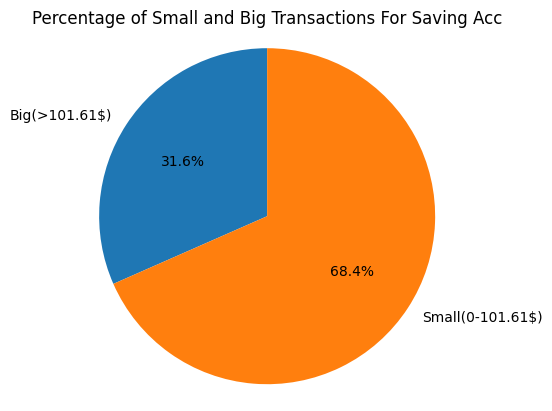

In [73]:
import matplotlib.pyplot as plt

labels = ['Big(>101.61$)','Small(0-101.61$)']

total_transactions = number_trans_saving.sum()

percentages_sv = number_trans_saving/ total_transactions * 100


sizes = percentages_sv.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Small and Big Transactions For Saving Acc')
plt.show()

### Select only Credite Acc 

In [74]:
credit_trans = data_trans[data_trans['acct_type'] == 'CC  ']
credit_trans 


,acct_nbr,tran_amnt,acct_type
4,4561143213634590,420.60,CC
10,4561143213625470,153.52,CC
11,4561143213634000,200.00,CC
17,4561143213629380,125.59,CC
18,4561143213632430,110.03,CC
...,...,...,...
66666,4561143213627210,64.67,CC
66667,4561143213632360,237.64,CC
66675,4561143213632660,180.00,CC
66684,4561143213632960,168.65,CC


In [75]:
mean_cc = credit_trans['tran_amnt'].mean() 
mean_cc

245.1248597876395

#### Add categorical to CC transaction Small or Big by using Mean()

In [76]:
credit_trans['transaction_category'] = np.where(credit_trans['tran_amnt'] <= mean_cc, 'Small', 'Big') #mean for acc type, take absolute value 

credit_trans

C:\Users\Tania\AppData\Local\Temp\ipykernel_9388\2131439749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_trans['transaction_category'] = np.where(credit_trans['tran_amnt'] <= mean_cc, 'Small', 'Big') #mean for acc type, take absolute value


,acct_nbr,tran_amnt,acct_type,transaction_category
4,4561143213634590,420.60,CC,Big
10,4561143213625470,153.52,CC,Small
11,4561143213634000,200.00,CC,Small
17,4561143213629380,125.59,CC,Small
18,4561143213632430,110.03,CC,Small
...,...,...,...,...
66666,4561143213627210,64.67,CC,Small
66667,4561143213632360,237.64,CC,Small
66675,4561143213632660,180.00,CC,Small
66684,4561143213632960,168.65,CC,Small


In [77]:
number_trans_cc = credit_trans.groupby('transaction_category').size()
number_trans_cc

transaction_category
Big       4687
Small    13678
dtype: int64

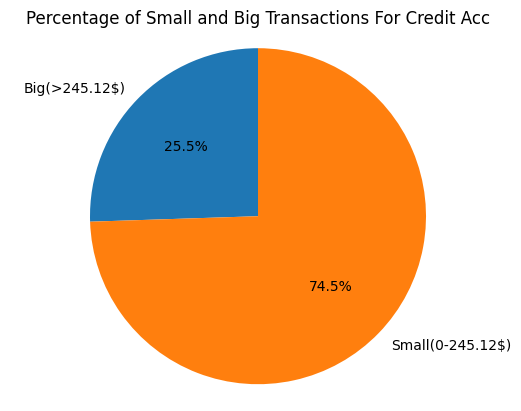

In [78]:
import matplotlib.pyplot as plt

labels = ['Big(>245.12$)','Small(0-245.12$)']

total_transactions = number_trans_cc.sum()

percentages_cc = number_trans_cc/ total_transactions * 100


sizes = percentages_cc.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Small and Big Transactions For Credit Acc')
plt.show()

### Select only Checking Acc

In [79]:

ck_trans = data_trans[data_trans['acct_type'] == 'CK  ']
ck_trans 

,acct_nbr,tran_amnt,acct_type
0,13630842,97.57,CK
1,13631412,0.15,CK
2,13625032,0.15,CK
3,13631642,40.00,CK
5,13627532,40.00,CK
...,...,...,...
66687,13625522,104.49,CK
66689,13631752,95.71,CK
66690,13626772,93.90,CK
66691,13625262,10.35,CK


In [80]:
mean_tran_ck = ck_trans['tran_amnt'].mean()
mean_tran_ck

139.22563892977294

### Add categorical to transaction Small or Big by using Mean()

In [81]:
ck_trans['transaction_category'] = np.where(ck_trans['tran_amnt'] <= mean_tran_ck, 'Small', 'Big') #mean for acc type, take absolute value 

ck_trans 

C:\Users\Tania\AppData\Local\Temp\ipykernel_9388\3129111776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ck_trans['transaction_category'] = np.where(ck_trans['tran_amnt'] <= mean_tran_ck, 'Small', 'Big') #mean for acc type, take absolute value


,acct_nbr,tran_amnt,acct_type,transaction_category
0,13630842,97.57,CK,Small
1,13631412,0.15,CK,Small
2,13625032,0.15,CK,Small
3,13631642,40.00,CK,Small
5,13627532,40.00,CK,Small
...,...,...,...,...
66687,13625522,104.49,CK,Small
66689,13631752,95.71,CK,Small
66690,13626772,93.90,CK,Small
66691,13625262,10.35,CK,Small


In [82]:
number_trans_ck= ck_trans.groupby('transaction_category').size()
number_trans_ck

transaction_category
Big      12153
Small    25895
dtype: int64

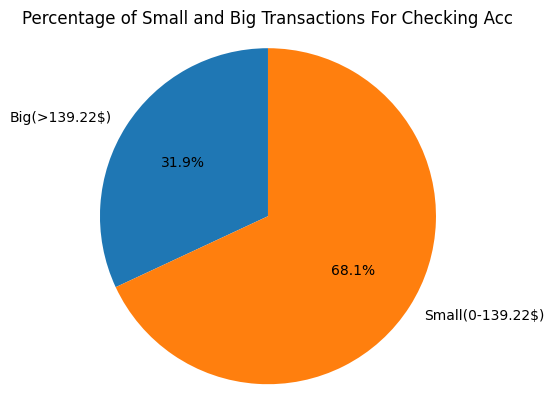

In [83]:
import matplotlib.pyplot as plt

labels = ['Big(>139.22$)','Small(0-139.22$)']

total_transactions = number_trans_ck.sum()

percentages_ck = number_trans_ck/ total_transactions * 100


sizes = percentages_ck.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Small and Big Transactions For Checking Acc')
plt.show()

In [84]:
percentages_ck[0]

31.94123212783852

### Avaluete for each Acc is it Small or Big transactions 
### Category : 1- Big, 0-Small 

In [85]:
# Fro SAving Acc 

saving_trans = saving_trans.groupby(['acct_nbr', 'transaction_category']).size().unstack(fill_value=0)
saving_trans

transaction_category,Big,Small
acct_nbr,,
13624803,9,13
13624843,14,19
13624863,6,19
13624873,4,11
13624893,7,12
...,...,...
13634903,0,12
13634913,7,10
13634923,10,12


In [86]:
saving_trans['Total'] = saving_trans.sum(axis=1)

saving_trans['Small_Percnt'] = saving_trans['Small'] / saving_trans['Total'] * 100
#transaction_counts['Medium_Percnt'] = transaction_counts['Medium'] / transaction_counts['Total'] * 100
saving_trans['Big_Percnt'] = saving_trans['Big'] / saving_trans['Total'] * 100

saving_trans

transaction_category,Big,Small,Total,Small_Percnt,Big_Percnt
acct_nbr,,,,,
13624803,9,13,22,59.090909,40.909091
13624843,14,19,33,57.575758,42.424242
13624863,6,19,25,76.000000,24.000000
13624873,4,11,15,73.333333,26.666667
13624893,7,12,19,63.157895,36.842105
...,...,...,...,...,...
13634903,0,12,12,100.000000,0.000000
13634913,7,10,17,58.823529,41.176471
13634923,10,12,22,54.545455,45.454545


In [87]:
# Fro saving Acc take value from Pie chart 31.6 68.4

saving_trans['Category'] = np.where(saving_trans['Big_Percnt'] >= percentages_sv[0], 1, 0) # 1 -Big, 0- Small
# saving_trans['Small_Category'] = np.where(saving_trans['Big_Percnt'] < 31.6, 1, 0) #change to avr num of transaction per 

saving_trans

transaction_category,Big,Small,Total,Small_Percnt,Big_Percnt,Category
acct_nbr,,,,,,
13624803,9,13,22,59.090909,40.909091,1
13624843,14,19,33,57.575758,42.424242,1
13624863,6,19,25,76.000000,24.000000,0
13624873,4,11,15,73.333333,26.666667,0
13624893,7,12,19,63.157895,36.842105,1
...,...,...,...,...,...,...
13634903,0,12,12,100.000000,0.000000,0
13634913,7,10,17,58.823529,41.176471,1
13634923,10,12,22,54.545455,45.454545,1


For Credit Acc: 

In [88]:
credit_trans = credit_trans.groupby(['acct_nbr', 'transaction_category']).size().unstack(fill_value=0)
credit_trans

transaction_category,Big,Small
acct_nbr,,
4561143213624800,11,18
4561143213624840,11,40
4561143213624850,11,58
4561143213624870,4,26
4561143213624890,20,14
...,...,...
4561143213634820,12,37
4561143213634830,13,54
4561143213634840,8,29


In [89]:
credit_trans['Total'] = credit_trans.sum(axis=1)

credit_trans['Small_Percnt'] = credit_trans['Small'] / credit_trans['Total'] * 100
#transaction_counts['Medium_Percnt'] = transaction_counts['Medium'] / transaction_counts['Total'] * 100
credit_trans['Big_Percnt'] = credit_trans['Big'] / credit_trans['Total'] * 100

credit_trans

transaction_category,Big,Small,Total,Small_Percnt,Big_Percnt
acct_nbr,,,,,
4561143213624800,11,18,29,62.068966,37.931034
4561143213624840,11,40,51,78.431373,21.568627
4561143213624850,11,58,69,84.057971,15.942029
4561143213624870,4,26,30,86.666667,13.333333
4561143213624890,20,14,34,41.176471,58.823529
...,...,...,...,...,...
4561143213634820,12,37,49,75.510204,24.489796
4561143213634830,13,54,67,80.597015,19.402985
4561143213634840,8,29,37,78.378378,21.621622


In [90]:
# Fro credit Acc take value from Pie chart 25,5

credit_trans['Category'] = np.where(credit_trans['Big_Percnt'] >= percentages_cc[0], 1, 0) # 1 - Big, 0 - Small 
#credit_trans['Small_Category'] = np.where(credit_trans['Big_Percnt'] < 25.5, 1, 0) #change to avr num of transaction per 

credit_trans

transaction_category,Big,Small,Total,Small_Percnt,Big_Percnt,Category
acct_nbr,,,,,,
4561143213624800,11,18,29,62.068966,37.931034,1
4561143213624840,11,40,51,78.431373,21.568627,0
4561143213624850,11,58,69,84.057971,15.942029,0
4561143213624870,4,26,30,86.666667,13.333333,0
4561143213624890,20,14,34,41.176471,58.823529,1
...,...,...,...,...,...,...
4561143213634820,12,37,49,75.510204,24.489796,0
4561143213634830,13,54,67,80.597015,19.402985,0
4561143213634840,8,29,37,78.378378,21.621622,0


For Checking Acc ck_trans

In [91]:
ck_trans = ck_trans.groupby(['acct_nbr', 'transaction_category']).size().unstack(fill_value=0)
ck_trans

transaction_category,Big,Small
acct_nbr,,
13624802,27,56
13624842,19,69
13624852,22,61
13624862,2,20
13624872,9,37
...,...,...
13634832,12,73
13634842,23,47
13634922,26,52


In [92]:
ck_trans['Total'] = ck_trans.sum(axis=1)

ck_trans['Small_Percnt'] = ck_trans['Small'] /ck_trans['Total'] * 100
#transaction_counts['Medium_Percnt'] = transaction_counts['Medium'] / transaction_counts['Total'] * 100
ck_trans['Big_Percnt'] = ck_trans['Big'] / ck_trans['Total'] * 100

ck_trans

transaction_category,Big,Small,Total,Small_Percnt,Big_Percnt
acct_nbr,,,,,
13624802,27,56,83,67.469880,32.530120
13624842,19,69,88,78.409091,21.590909
13624852,22,61,83,73.493976,26.506024
13624862,2,20,22,90.909091,9.090909
13624872,9,37,46,80.434783,19.565217
...,...,...,...,...,...
13634832,12,73,85,85.882353,14.117647
13634842,23,47,70,67.142857,32.857143
13634922,26,52,78,66.666667,33.333333


### Category : 1- Big, 0-Small 

In [93]:
# Fro checking Acc take value from Pie chart 31.9

ck_trans['Category'] = np.where(ck_trans['Big_Percnt'] >= percentages_ck[0], 1, 0) #1 Big, 0-Small 
#ck_trans['Small_Category'] = np.where(ck_trans['Big_Percnt'] < percentages_ck[0], 1, 0) #change to avr num of transaction per 

ck_trans

transaction_category,Big,Small,Total,Small_Percnt,Big_Percnt,Category
acct_nbr,,,,,,
13624802,27,56,83,67.469880,32.530120,1
13624842,19,69,88,78.409091,21.590909,0
13624852,22,61,83,73.493976,26.506024,0
13624862,2,20,22,90.909091,9.090909,0
13624872,9,37,46,80.434783,19.565217,0
...,...,...,...,...,...,...
13634832,12,73,85,85.882353,14.117647,0
13634842,23,47,70,67.142857,32.857143,1
13634922,26,52,78,66.666667,33.333333,1


### Merge all transformed  data to one data frame

In [94]:
merged_trans = pd.concat([ck_trans, credit_trans, saving_trans])
merged_trans 

transaction_category,Big,Small,Total,Small_Percnt,Big_Percnt,Category
acct_nbr,,,,,,
13624802,27,56,83,67.469880,32.530120,1
13624842,19,69,88,78.409091,21.590909,0
13624852,22,61,83,73.493976,26.506024,0
13624862,2,20,22,90.909091,9.090909,0
13624872,9,37,46,80.434783,19.565217,0
...,...,...,...,...,...,...
13634903,0,12,12,100.000000,0.000000,0
13634913,7,10,17,58.823529,41.176471,1
13634923,10,12,22,54.545455,45.454545,1


In [95]:
merged_df = pd.merge(data_account, saving_acc[['acct_nbr', 'saving']], on='acct_nbr', how='left')


merged_df  = pd.merge(merged_df , debt_acc[['acct_nbr', 'debt']], on='acct_nbr', how='left')
merged_df = pd.merge(merged_df, merged_trans[['Category']], left_on='acct_nbr', right_index=True, how='left')

#merged_df = pd.merge(merged_df, saving_trans[['Category']], left_on='acct_nbr', right_index=True, how='left')
#merged_df = pd.merge(merged_df, credit_trans[['Category']], left_on='acct_nbr', right_index=True, how='left')


In [96]:
merged_df

,acct_nbr,acct_type,account_active,starting_balance,ending_balance,saving,debt,Category
0,13628063,SV,Y,1430.22,284.58,-1145.64,NaN,1.0
1,4561143213627090,CC,Y,266.34,496.15,NaN,229.81,0.0
2,4561143213628360,CC,Y,55.90,1000.00,NaN,944.10,0.0
3,13633112,CK,Y,11017.13,968.46,NaN,NaN,1.0
4,4561143213633610,CC,Y,849.37,462.28,NaN,-387.09,1.0
...,...,...,...,...,...,...,...,...
1404,4561143213625560,CC,N,1433.94,20.00,NaN,-1413.94,1.0
1405,4561143213626240,CC,Y,632.75,1400.00,NaN,767.25,1.0
1406,4561143213628750,CC,Y,2810.91,3000.00,NaN,189.09,0.0
1407,13626543,SV,Y,784.53,622.46,-162.07,NaN,0.0


In [97]:
merged_df.fillna(0, inplace=True)
merged_df

,acct_nbr,acct_type,account_active,starting_balance,ending_balance,saving,debt,Category
0,13628063,SV,Y,1430.22,284.58,-1145.64,0.00,1.0
1,4561143213627090,CC,Y,266.34,496.15,0.00,229.81,0.0
2,4561143213628360,CC,Y,55.90,1000.00,0.00,944.10,0.0
3,13633112,CK,Y,11017.13,968.46,0.00,0.00,1.0
4,4561143213633610,CC,Y,849.37,462.28,0.00,-387.09,1.0
...,...,...,...,...,...,...,...,...
1404,4561143213625560,CC,N,1433.94,20.00,0.00,-1413.94,1.0
1405,4561143213626240,CC,Y,632.75,1400.00,0.00,767.25,1.0
1406,4561143213628750,CC,Y,2810.91,3000.00,0.00,189.09,0.0
1407,13626543,SV,Y,784.53,622.46,-162.07,0.00,0.0


In [98]:
acct_type = merged_df.groupby('acct_type').size()
acct_type

acct_type
CC      468
CK      520
SV      421
dtype: int64

In [99]:
merged_df.columns

Index(['acct_nbr', 'acct_type', 'account_active', 'starting_balance',
       'ending_balance', 'saving', 'debt', 'Category'],
      dtype='object')

In [100]:
merged_df['acct_type'] = merged_df['acct_type'].replace({'CC  ': 1, 'CK  ': 2, 'SV  ': 2})
merged_df['account_active'] = merged_df['account_active'].replace({'Y ': 1, 'N ': 0})

merged_df

,acct_nbr,acct_type,account_active,starting_balance,ending_balance,saving,debt,Category
0,13628063,2,1,1430.22,284.58,-1145.64,0.00,1.0
1,4561143213627090,1,1,266.34,496.15,0.00,229.81,0.0
2,4561143213628360,1,1,55.90,1000.00,0.00,944.10,0.0
3,13633112,2,1,11017.13,968.46,0.00,0.00,1.0
4,4561143213633610,1,1,849.37,462.28,0.00,-387.09,1.0
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1,0,1433.94,20.00,0.00,-1413.94,1.0
1405,4561143213626240,1,1,632.75,1400.00,0.00,767.25,1.0
1406,4561143213628750,1,1,2810.91,3000.00,0.00,189.09,0.0
1407,13626543,2,1,784.53,622.46,-162.07,0.00,0.0


In [101]:
#Separate numerical and categoracal data

numerical_data = merged_df[['starting_balance', 'ending_balance', 'saving', 'debt']]
categorical_data = merged_df[['acct_nbr', 'acct_type', 'account_active', 'Category']]


In [102]:
numerical_data

,starting_balance,ending_balance,saving,debt
0,1430.22,284.58,-1145.64,0.00
1,266.34,496.15,0.00,229.81
2,55.90,1000.00,0.00,944.10
3,11017.13,968.46,0.00,0.00
4,849.37,462.28,0.00,-387.09
...,...,...,...,...
1404,1433.94,20.00,0.00,-1413.94
1405,632.75,1400.00,0.00,767.25
1406,2810.91,3000.00,0.00,189.09
1407,784.53,622.46,-162.07,0.00


In [103]:
categorical_data    #### ! drop acct_nbr ! 

,acct_nbr,acct_type,account_active,Category
0,13628063,2,1,1.0
1,4561143213627090,1,1,0.0
2,4561143213628360,1,1,0.0
3,13633112,2,1,1.0
4,4561143213633610,1,1,1.0
...,...,...,...,...
1404,4561143213625560,1,0,1.0
1405,4561143213626240,1,1,1.0
1406,4561143213628750,1,1,0.0
1407,13626543,2,1,0.0


### Data Normalizid and Clustering

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Z-score normalization
#selected_columns = ['income', 'age', 'years_with_bank', 'nbr_children']

scaler_zscore = StandardScaler()
data_ztrnz = scaler_zscore.fit_transform(numerical_data)
data_ztrnz


array([[-0.00234847, -0.46630699, -2.06216869, -0.01738429],
       [-0.53479235, -0.33063585, -0.18772665,  0.17778516],
       [-0.63106301, -0.00753757, -0.18772665,  0.78440622],
       ...,
       [ 0.62928017,  1.27498016, -0.18772665,  0.14320312],
       [-0.29773433, -0.24963844, -0.45289793, -0.01738429],
       [ 1.01276621, -0.57997012, -0.18772665, -0.01738429]])

In [105]:
numerical_df  = pd.DataFrame(data_ztrnz)

numerical_df.columns = numerical_df.columns.astype(str)

numerical_df.rename(columns={'0': 'starting_balance', '1':'ending_balance', '2':'saving', 
                             '3': 'debt', '4': 'total_transaction_amount'}, inplace=True)

numerical_df

,starting_balance,ending_balance,saving,debt
0,-0.002348,-0.466307,-2.062169,-0.017384
1,-0.534792,-0.330636,-0.187727,0.177785
2,-0.631063,-0.007538,-0.187727,0.784406
3,4.383406,-0.027763,-0.187727,-0.017384
4,-0.268072,-0.352355,-0.187727,-0.346126
...,...,...,...,...
1404,-0.000647,-0.635971,-0.187727,-1.218193
1405,-0.367170,0.248966,-0.187727,0.634214
1406,0.629280,1.274980,-0.187727,0.143203
1407,-0.297734,-0.249638,-0.452898,-0.017384


In [106]:
#Merge Numerical and categorical df : acct_type	account_active	transaction_category

data_future = pd.concat([numerical_df, categorical_data[['acct_type','account_active', 'Category' ]]], axis=1)
data_future.head()

,starting_balance,ending_balance,saving,debt,acct_type,account_active,Category
0,-0.002348,-0.466307,-2.062169,-0.017384,2,1,1.0
1,-0.534792,-0.330636,-0.187727,0.177785,1,1,0.0
2,-0.631063,-0.007538,-0.187727,0.784406,1,1,0.0
3,4.383406,-0.027763,-0.187727,-0.017384,2,1,1.0
4,-0.268072,-0.352355,-0.187727,-0.346126,1,1,1.0


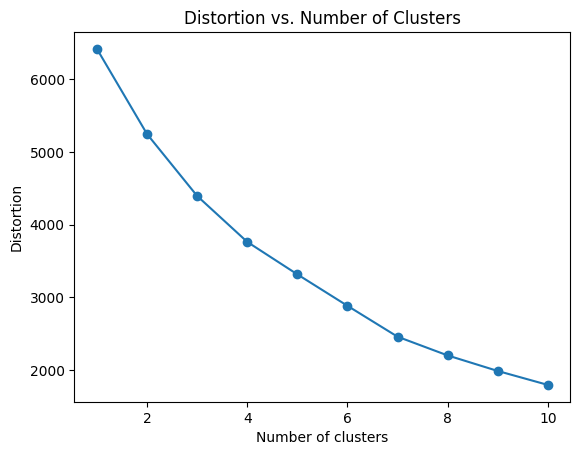

In [107]:

def plot_distortion(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
       
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Distortion vs. Number of Clusters')
    plt.show()

plot_distortion(data_future)

n=4

### K_means

In [125]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_future)

cluster_labels = kmeans.labels_

data_future['cluster_k'] = cluster_labels

data_future['cluster_k'].value_counts()


c:\Users\Tania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0    1046
2     180
3     102
1      72
4       9
Name: cluster_k, dtype: int64

In [126]:
data_future

,starting_balance,ending_balance,saving,debt,acct_type,account_active,Category,cluster_k
0,-0.002348,-0.466307,-2.062169,-0.017384,2,1,1.0,0
1,-0.534792,-0.330636,-0.187727,0.177785,1,1,0.0,0
2,-0.631063,-0.007538,-0.187727,0.784406,1,1,0.0,0
3,4.383406,-0.027763,-0.187727,-0.017384,2,1,1.0,2
4,-0.268072,-0.352355,-0.187727,-0.346126,1,1,1.0,0
...,...,...,...,...,...,...,...,...
1404,-0.000647,-0.635971,-0.187727,-1.218193,1,0,1.0,2
1405,-0.367170,0.248966,-0.187727,0.634214,1,1,1.0,0
1406,0.629280,1.274980,-0.187727,0.143203,1,1,0.0,0
1407,-0.297734,-0.249638,-0.452898,-0.017384,2,1,0.0,0


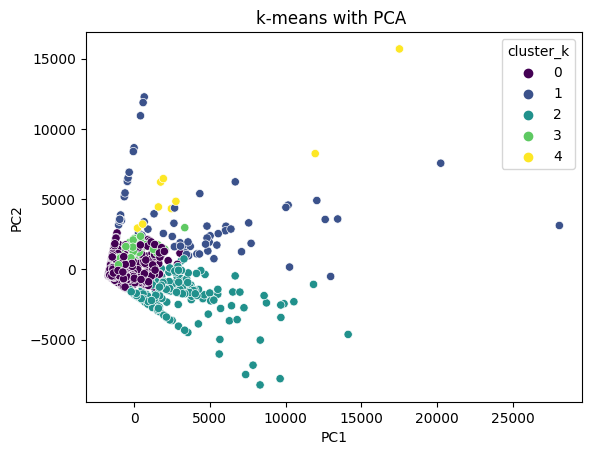

In [127]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_data)


df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster_k'] = data_future['cluster_k'] 

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster_k', palette='viridis')
plt.title('k-means with PCA ')
plt.show()

C:\Users\Tania\AppData\Local\Temp\ipykernel_9388\935404076.py:24: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



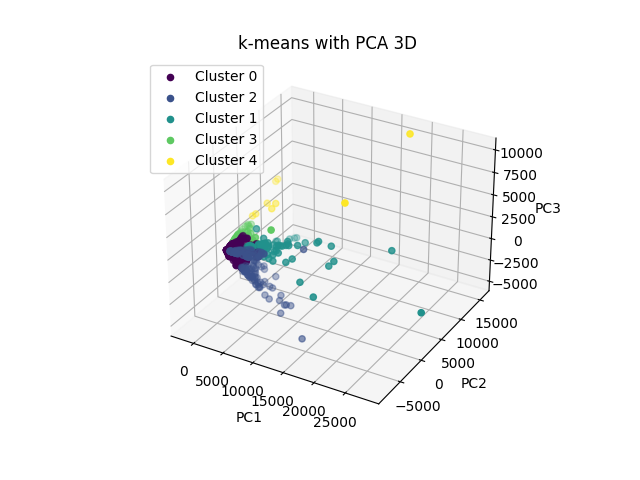

In [133]:
# 3 D Visualization

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
principal_components = pca.fit_transform(numerical_data)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca['cluster_k'] = data_future['cluster_k']

# Enable interactive mode
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

clusters = df_pca['cluster_k'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    indices = df_pca['cluster_k'] == cluster
    ax.scatter(df_pca.loc[indices, 'PC1'], df_pca.loc[indices, 'PC2'], df_pca.loc[indices, 'PC3'],
               c=color, label=f'Cluster {cluster}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('k-means with PCA 3D')
plt.legend()
plt.show()


### 2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other

In [128]:
import plotly.graph_objects as go

In [129]:
df = data_future.copy()

# Define the cluster labels
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']  

# Group the data by cluster
cluster_data = df.groupby('cluster_k').mean()

# Select the columns for visualization (excluding non-numeric columns)
columns_to_visualize = ['starting_balance', 'ending_balance', 'saving', 'debt']

# Prepare the data for each cluster
data = []
for i, cluster_label in enumerate(cluster_labels):
    values = cluster_data.loc[i, columns_to_visualize].values
    data.append(go.Scatterpolar(
        r=values,
        theta=columns_to_visualize,
        fill='toself',
        name=cluster_label
    ))


In [114]:
fig = go.Figure(data)
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    showlegend=True
)
fig.show()

2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.

In [115]:
colun = ['cluster_k']
data_future2 = data_future.drop(columns=colun)

data_future2

,starting_balance,ending_balance,saving,debt,acct_type,account_active,Category
0,-0.002348,-0.466307,-2.062169,-0.017384,2,1,1.0
1,-0.534792,-0.330636,-0.187727,0.177785,1,1,0.0
2,-0.631063,-0.007538,-0.187727,0.784406,1,1,0.0
3,4.383406,-0.027763,-0.187727,-0.017384,2,1,1.0
4,-0.268072,-0.352355,-0.187727,-0.346126,1,1,1.0
...,...,...,...,...,...,...,...
1404,-0.000647,-0.635971,-0.187727,-1.218193,1,0,1.0
1405,-0.367170,0.248966,-0.187727,0.634214,1,1,1.0
1406,0.629280,1.274980,-0.187727,0.143203,1,1,0.0
1407,-0.297734,-0.249638,-0.452898,-0.017384,2,1,0.0


3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.

c:\Users\Tania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



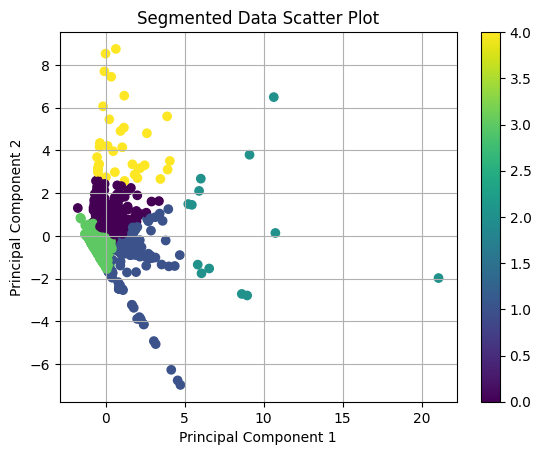

In [130]:
pca = PCA(n_components=2)
X = data_future2.values
X_pca = pca.fit_transform(X)


kmeans = KMeans(n_clusters=5, random_state=0)
y_res = kmeans.fit_predict(X_pca)

# Plot scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segmented Data Scatter Plot')
plt.colorbar()
plt.grid(True)
plt.show()

4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [118]:
data_future2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   starting_balance  1409 non-null   float64
 1   ending_balance    1409 non-null   float64
 2   saving            1409 non-null   float64
 3   debt              1409 non-null   float64
 4   acct_type         1409 non-null   int64  
 5   account_active    1409 non-null   int64  
 6   Category          1409 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 77.2 KB


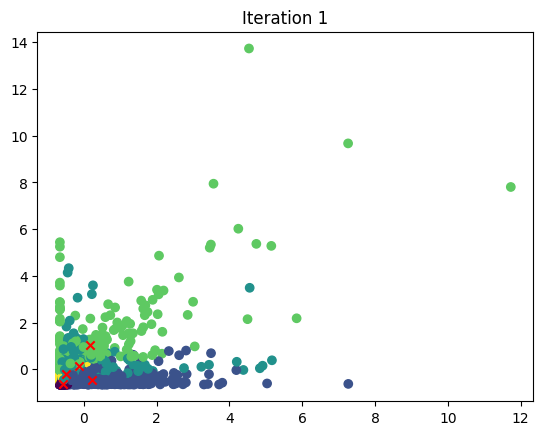

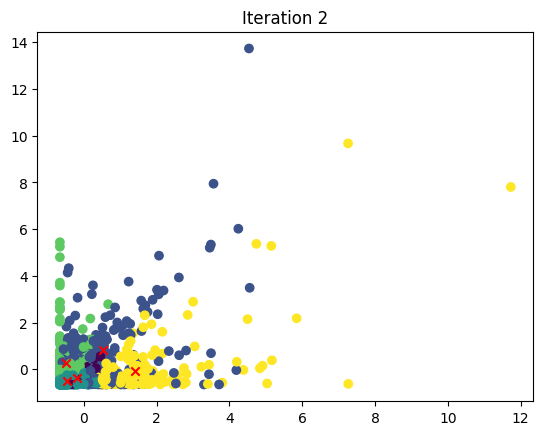

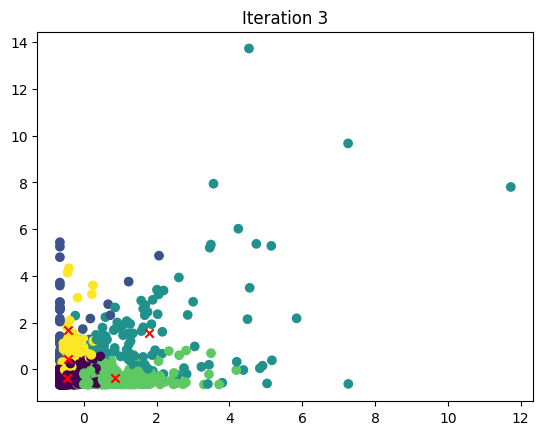

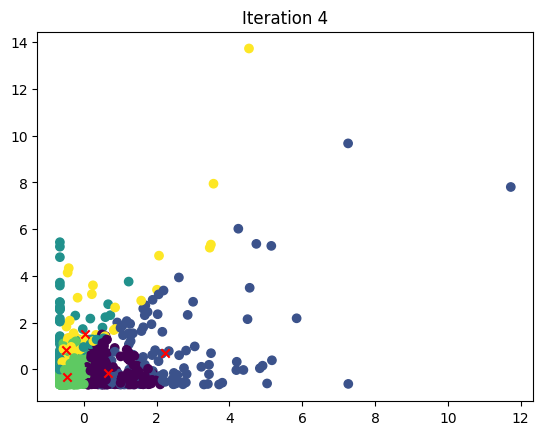

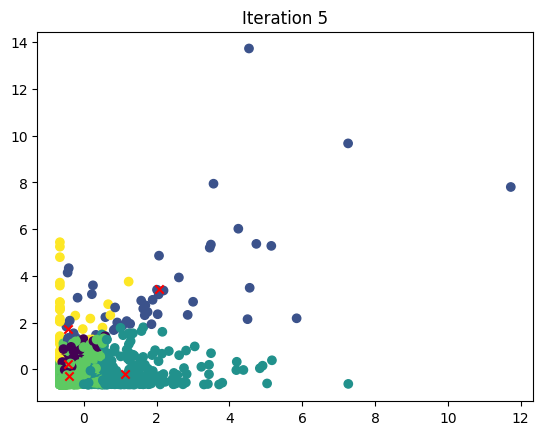

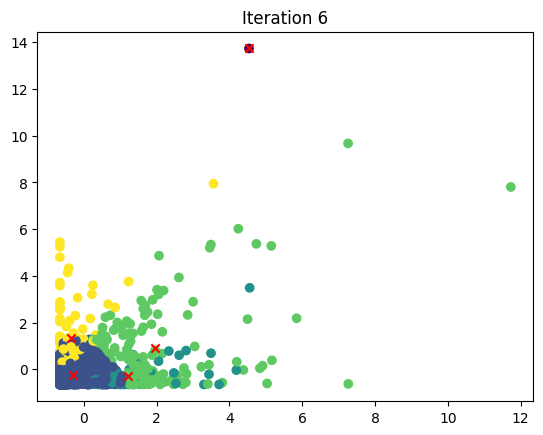

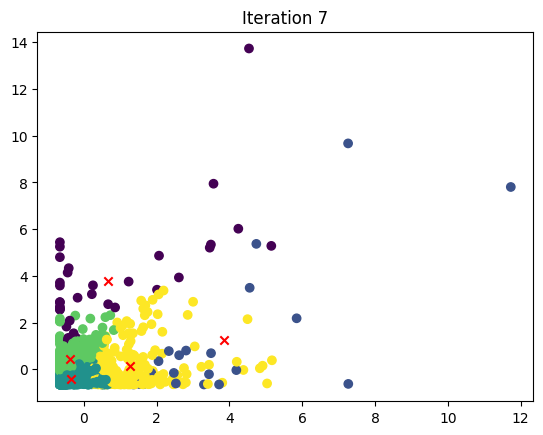

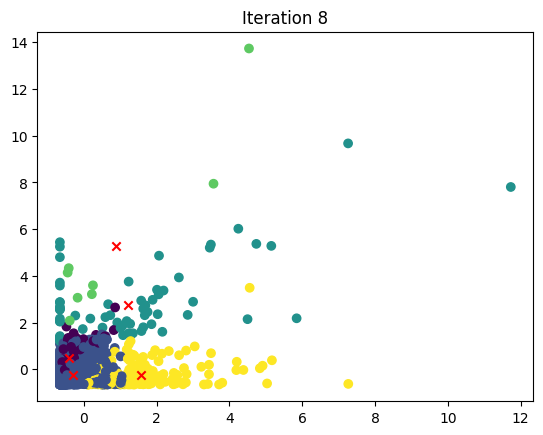

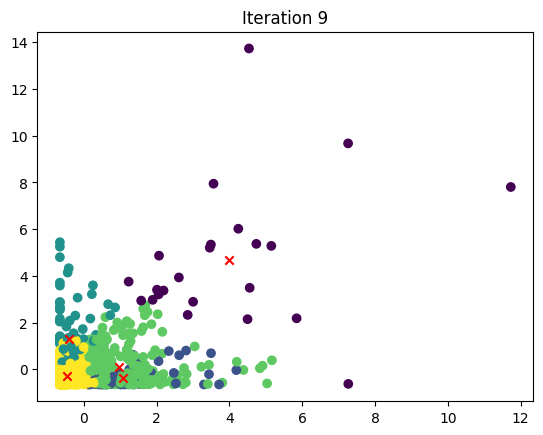

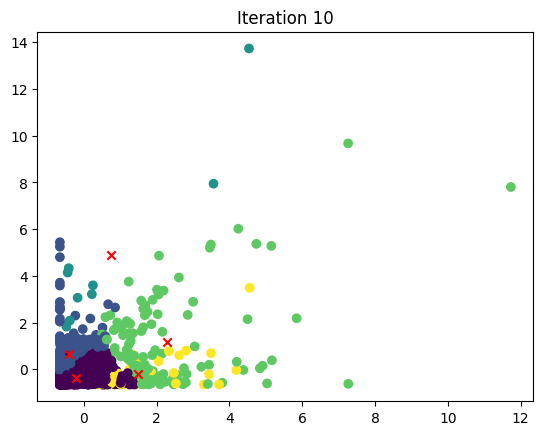

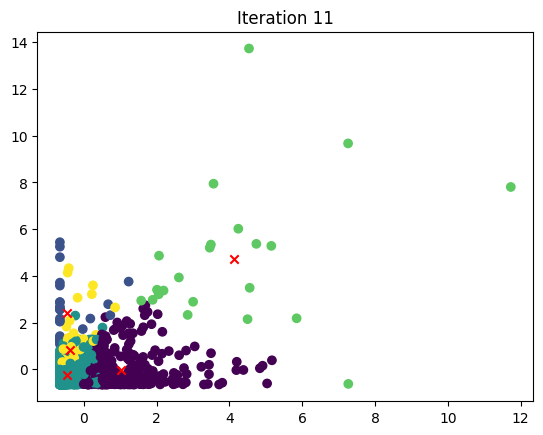

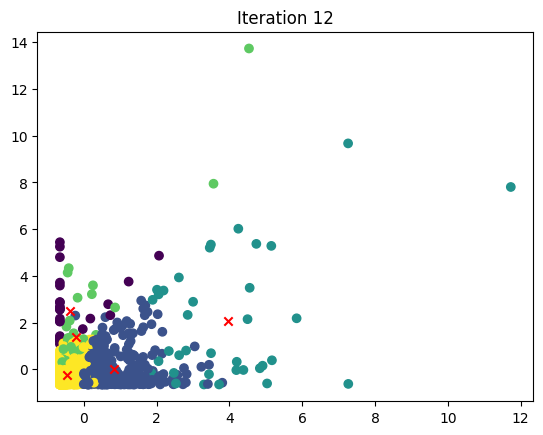

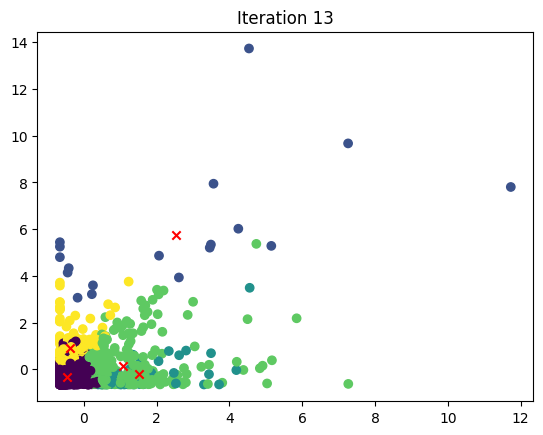

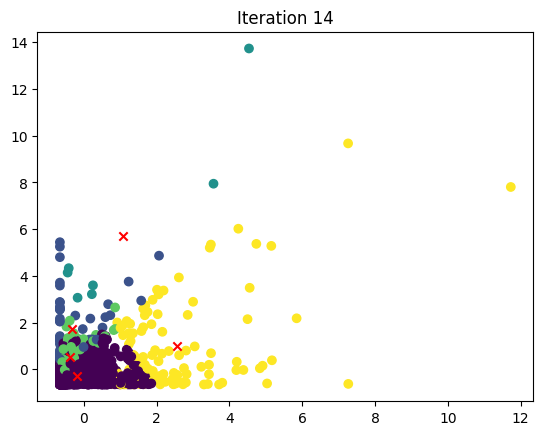

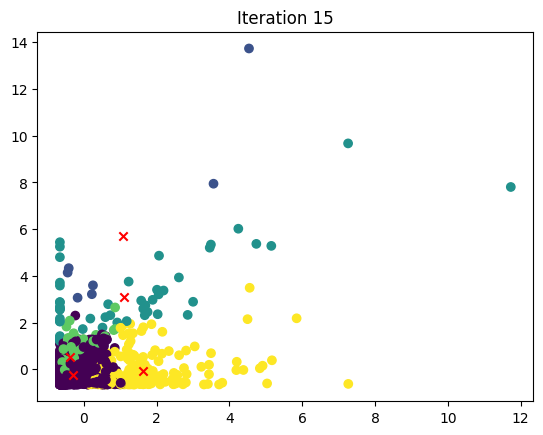

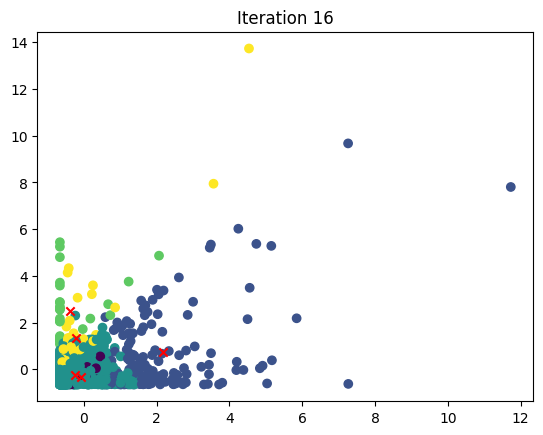

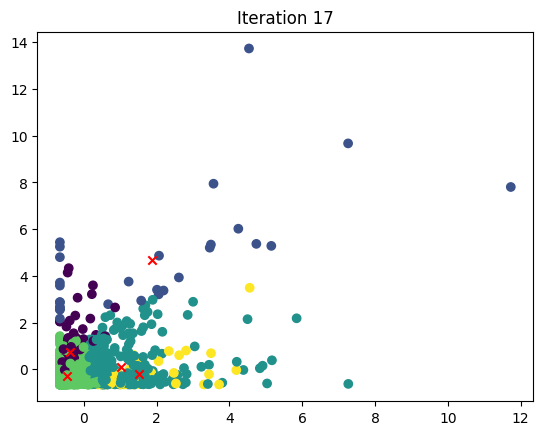

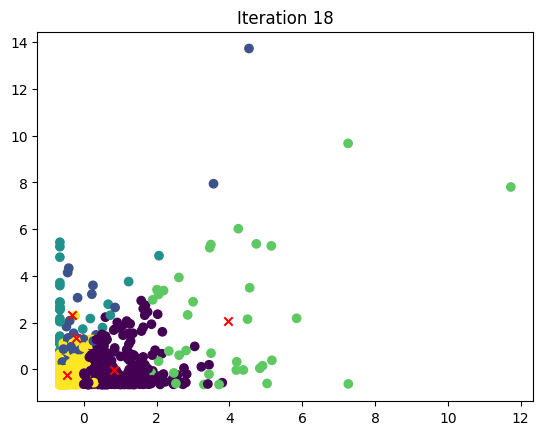

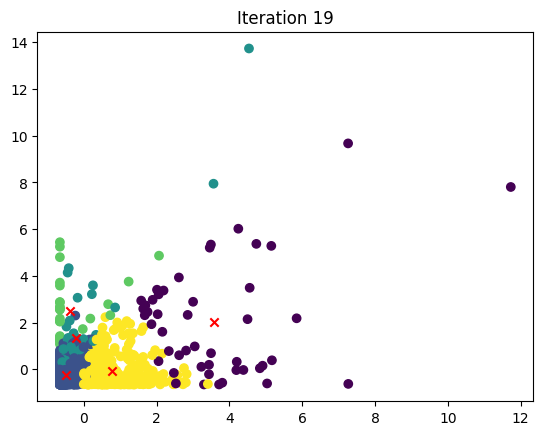

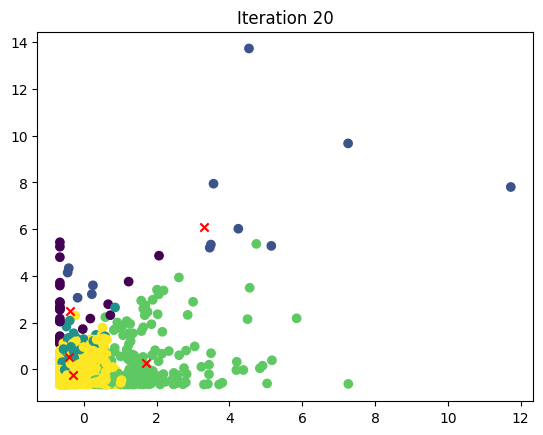

In [131]:

import numpy as np
import matplotlib.pyplot as plt


X = data_future2[['starting_balance', 'ending_balance', 'saving', 'debt']].values


def kmeans(X, num_clusters, num_iterations):
    
    centroids = X[np.random.choice(range(X.shape[0]), size=num_clusters)]
    
    
    for _ in range(num_iterations):
        
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
        labels = np.argmin(distances, axis=-1)
        
        # Update centroids based on the mean of assigned data points
        for i in range(num_clusters):
            centroids[i] = np.mean(X[labels == i], axis=0)
    
    return centroids, labels


num_iterations = 20  # Define the number of iterations
num_clusters = 5  # Define the number of clusters
centroids, labels = kmeans(X, num_clusters, num_iterations)

for i in range(num_iterations):
    
    centroids, labels = kmeans(X, num_clusters, i + 1)
    
    # Plot data  
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.title(f"Iteration {i+1}")
    plt.show()




In [120]:
dt_saving = pd.read_csv("twm_savings_acct.csv", delimiter=';')

In [121]:
dt_saving

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [122]:
dt_checking = pd.read_csv("twm_checking_tran.csv", delimiter=';')
dt_checking

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD
...,...,...,...,...,...,...,...,...,...,...
46199,1363272,50,-0.15,-0.15,0.0,319.71,3.10.1995,,,FK
46200,1363393,61,-102.52,-102.52,0.0,57.47,22.1.1995,,P,WD
46201,1363365,25,-275.89,-275.89,0.0,2632.93,8.1.1995,,P,WD
46202,1363031,73,-0.15,-0.15,0.0,1103.47,23.1.1995,,,FK


In [123]:
dt_credit = pd.read_csv("twm_credit_acct.csv", delimiter=';')
dt_credit

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [124]:
cust_cr_id = dt_credit.groupby('cust_id').size()
cust_cr_id

cust_id
1362480    1
1362484    1
1362485    1
1362487    1
1362489    1
          ..
1363484    1
1363485    1
1363486    1
1363492    1
1363493    1
Length: 468, dtype: int64